# Assignment 2

In [1]:
SECTION = "CS156 MW Prof.Sterne"
STUDENT_ID = "706189"
DATA_USED = "The Lending Club loan data"

## Report
In this assignment, I trained a linear classifier (logistic regression) on the loan application data. The general idea was to train a classifier and use the classifier to determine the maximum amount of money one can ask for and get accepted by incrementing the loan amount from 0 to the max until it gets rejected. 
#### variables:
In the model, I used variables 'loan amount', 'application date', 'credit score', 'debt-to-income ratio', 'zip code', 'employment length', and 'loan accepted', which is whether the loan was accepted or not. When pre-processing the data, I realized that policy_code and loan_accepted are highly correlated. As I couldn't find specific information about the policy code variable in the dataset, I decided to remove it when training the model. It is because I thought that it could be a dependent variable determined by other independent variables as well. So, to avoid overfitting in the model training, I ignored 'policy_score'. (Tested: when using 'policy_score', the model had accuracy of 0.98. Without it, the accuracy was 0.88, which is more reasonable given the dataset.)
#### data cleaning/transformation:
As the rejected and accepted datasets had different number of variables, I extracted only the overlapping variables. To use the application dates, I converted them to numerical values. Most importantly, I had to drop all the data with missing credit scores (which was almost 40% of the rejected data). I tried using the mean for the missing values, but the model performance was not adequate. I also tried using binary encoding to account for missing data in the application as I thought missing cred scores can cause an application to be denied. But, the model performance did not improve. So, I concluded that removing the missing data would be optimal as training on complete data will allow the model to be more reliable. Lastly, I encoded the zip code with binary encoding, which allowed me to have them coded in 10 columns. However, due to potential complications in the training of the model, I had to encode it before saving the data to a csv file. I know that it's a bit of cheating considering that we will use unseen data in the future for this model. So, when a new data is introduced, it would be difficult to get the exact encoding for the zipcode. But, to keep this assignment simpler, I decided to move forward with this approach. 
#### model used and settings:
I used logistic regression as it is a binary classifier. So, the model is trained on the independent variables. In the model training, I dropped policy-code due to the reason I explained in the data cleaning section. As the whole dataset was too large for my processor, I randomly sampled 1000000 data form the set using 'subsample' library. 
#### training method:
At first, I separated the dataset into holdout data and training datasets. Then, I separated the training data into train and test datasets. I used cross validation when training the model. The accuracy of the model against the train set was 0.8810, and the accuracy against the test set was 0.8849. Given the ratio of accepted to rejected data (19/81), this accuracy is a bit better than classifying all of them as rejected. I also included the confusion matrix and classification report of the model on the training to see the accuracy for each class. The precision for the rejected was 0.92 while that of the accepted was 0.70. So, the model performance seemed not that random. From the precision and recall scores, I concluded that the training model was actually trying to be trained. 
#### estimated performance on unseen data:
On the holdout data, which were unseen to the model, the classifier had accuracy of 0.88. However, the function that determines that maximum amount of loan to be accepted did not work as I expected. It outputs only 0 or max loan amount in the dataset as I put it as the approximate higher bound. So, in other words, the model is not very dependent on or robust to the amount of loan. It was shown in the correlation matrix that the loan amount is not very correlated to whether the application is be accepted or not. The next steps will be to figure out how to make the model more robust to the loan amounts. Nevertheless, the performance of the classifier is reasonable. 
#### reflection: 
I spent more than 15 hours on this assignment, but I could not come up with an efficient model that suggests highest amount of loan one can apply for. Nevertheless, I learned how to clean data, subsample, and use feature scaling, which improved my classifier accuracy from 0.60 to 0.88.

## Data processing

In [2]:
import pandas as pd
import numpy as np

In [3]:
# read the datasets
acc = pd.read_csv("accepted_2007_to_2018Q4.csv")
rej = pd.read_csv("rejected_2007_to_2018Q4.csv")

/Users/oyunbilegdavaanyam/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
acc.shape[0]/rej.shape[0]

0.08176506120115921

In [5]:
acc.head().T

,0,1,2,3,4
id,68407277,68355089,68341763,66310712,68476807
member_id,NaN,NaN,NaN,NaN,NaN
loan_amnt,3600.0,24700.0,20000.0,35000.0,10400.0
funded_amnt,3600.0,24700.0,20000.0,35000.0,10400.0
funded_amnt_inv,3600.0,24700.0,20000.0,35000.0,10400.0
...,...,...,...,...,...
settlement_status,NaN,NaN,NaN,NaN,NaN
settlement_date,NaN,NaN,NaN,NaN,NaN
settlement_amount,NaN,NaN,NaN,NaN,NaN
settlement_percentage,NaN,NaN,NaN,NaN,NaN


In [6]:
acc.describe().T

,count,mean,std,min,25%,50%,75%,max
member_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,2260668.0,15046.931228,9190.245488,500.00,8000.00,12900.00,20000.0000,40000.00
funded_amnt,2260668.0,15041.664057,9188.413022,500.00,8000.00,12875.00,20000.0000,40000.00
funded_amnt_inv,2260668.0,15023.437745,9192.331679,0.00,8000.00,12800.00,20000.0000,40000.00
int_rate,2260668.0,13.092829,4.832138,5.31,9.49,12.62,15.9900,30.99
...,...,...,...,...,...,...,...,...
hardship_payoff_balance_amount,10917.0,11636.883942,7625.988281,55.73,5627.00,10028.39,16151.8900,40306.41
hardship_last_payment_amount,10917.0,193.994321,198.629496,0.01,44.44,133.16,284.1900,1407.86
settlement_amount,34246.0,5010.664267,3693.122590,44.21,2208.00,4146.11,6850.1725,33601.00
settlement_percentage,34246.0,47.780365,7.311822,0.20,45.00,45.00,50.0000,521.35


In [7]:
rej.head().T

,0,1,2,3,4
Amount Requested,1000.0,1000.0,11000.0,6000.0,1500.0
Application Date,2007-05-26,2007-05-26,2007-05-27,2007-05-27,2007-05-27
Loan Title,Wedding Covered but No Honeymoon,Consolidating Debt,Want to consolidate my debt,waksman,mdrigo
Risk_Score,693.0,703.0,715.0,698.0,509.0
Debt-To-Income Ratio,10%,10%,10%,38.64%,9.43%
Zip Code,481xx,010xx,212xx,017xx,209xx
State,NM,MA,MD,MA,MD
Employment Length,4 years,< 1 year,1 year,< 1 year,< 1 year
Policy Code,0.0,0.0,0.0,0.0,0.0


In [8]:
rej.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount Requested,27648741.0,13133.240309,15009.636325,0.0,4800.0,10000.0,20000.0,1400000.0
Risk_Score,9151111.0,628.172090,89.936793,0.0,591.0,637.0,675.0,990.0
Policy Code,27647823.0,0.006375,0.112737,0.0,0.0,0.0,0.0,2.0


### Relevant variables:
Relevant variables were chosen from those in the accepted loan dataset based on the variables in the rejected loan dataset as the dataset had only 9 variables. I removed 'State' variable from the dataset as I thought the zipcode contains this information.

Definition of relevant columns in the rejected dataset:
* 'Amount Requested': loan amount requested by the borrower
* 'Application Date': application submitted date
* 'Risk_Score': the risk score of the applicant. But, the risk scores for the applicants before Nov 5 2013 were their FICO scores while those for the applicants after that were their Vantage scores. 
* 'Debt-To-Income Ratio': a ratio of the borrower's debt to their income
* 'Zip Code': the first digits of the applican't zip code
* 'Employment Length': the applicant's employment length
* 'Policy Code': publicly available policy code equals 1 while not publicly available policy equals 2

Definition of relevant columns in the accepted dataset:
* 'loan_amnt': The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
* 'issue_d': The date the loan was issued.
* 'fico_range_low': The lower boundary range the borrower’s FICO at loan origination belongs to.
* 'fico_range_high': The upper boundary range the borrower’s FICO at loan origination belongs to.
* 'dti': A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
* 'zip_code': The first 3 numbers of the zip code provided by the borrower in the loan application.
* 'emp_length': Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
* 'policy_code': publicly available policy code equals 1 while not publicly available policy equals 2

In [9]:
# remove the columns that we won't use from the dataframes
acc_df = acc[['loan_amnt', 'issue_d', 'fico_range_low', 'fico_range_high', 'dti', 'zip_code', 'emp_length', 'policy_code']].copy()
rej_df = rej[['Amount Requested', 'Application Date', 'Risk_Score', 'Debt-To-Income Ratio', 'Zip Code', 'Employment Length', 'Policy Code']].copy()

In [10]:
acc_df.head().T

,0,1,2,3,4
loan_amnt,3600.0,24700.0,20000.0,35000.0,10400.0
issue_d,Dec-2015,Dec-2015,Dec-2015,Dec-2015,Dec-2015
fico_range_low,675.0,715.0,695.0,785.0,695.0
fico_range_high,679.0,719.0,699.0,789.0,699.0
dti,5.91,16.06,10.78,17.06,25.37
zip_code,190xx,577xx,605xx,076xx,174xx
emp_length,10+ years,10+ years,10+ years,10+ years,3 years
policy_code,1.0,1.0,1.0,1.0,1.0


In [11]:
rej_df.head().T

,0,1,2,3,4
Amount Requested,1000.0,1000.0,11000.0,6000.0,1500.0
Application Date,2007-05-26,2007-05-26,2007-05-27,2007-05-27,2007-05-27
Risk_Score,693.0,703.0,715.0,698.0,509.0
Debt-To-Income Ratio,10%,10%,10%,38.64%,9.43%
Zip Code,481xx,010xx,212xx,017xx,209xx
Employment Length,4 years,< 1 year,1 year,< 1 year,< 1 year
Policy Code,0.0,0.0,0.0,0.0,0.0


In [12]:
# convert dates to datetime
acc_df['issue_d'] = pd.to_datetime(acc_df['issue_d'])
rej_df['Application Date'] = pd.to_datetime(rej_df['Application Date'])

As shown below, I took the mean of 'fico_range_low' and 'fico_range_high' to get the credit score for the accepted applications. Even though the credit scores for the rejected applications differ before and after 2013, I assume that they are similar in this case as I have not enough knowledge how FICO and Vantage scores differ in their effects on loan applications. 

In [13]:
# take a mean of fico_range_low and fico_range_high to get a combined risk score for acc_df 
acc_df['fico_range_low'] = (acc_df['fico_range_low']+acc_df['fico_range_high'])/2
# drop 'fico_range_high' column as we put the combined score under 'fico_range_low'
acc_df = acc_df.drop(['fico_range_high'], axis=1)

In [14]:
acc_df.head()

,loan_amnt,issue_d,fico_range_low,dti,zip_code,emp_length,policy_code
0,3600.0,2015-12-01,677.0,5.91,190xx,10+ years,1.0
1,24700.0,2015-12-01,717.0,16.06,577xx,10+ years,1.0
2,20000.0,2015-12-01,697.0,10.78,605xx,10+ years,1.0
3,35000.0,2015-12-01,787.0,17.06,076xx,10+ years,1.0
4,10400.0,2015-12-01,697.0,25.37,174xx,3 years,1.0


In [15]:
rej_df.head()

,Amount Requested,Application Date,Risk_Score,Debt-To-Income Ratio,Zip Code,Employment Length,Policy Code
0,1000.0,2007-05-26,693.0,10%,481xx,4 years,0.0
1,1000.0,2007-05-26,703.0,10%,010xx,< 1 year,0.0
2,11000.0,2007-05-27,715.0,10%,212xx,1 year,0.0
3,6000.0,2007-05-27,698.0,38.64%,017xx,< 1 year,0.0
4,1500.0,2007-05-27,509.0,9.43%,209xx,< 1 year,0.0


In [16]:
# convert Debt-To-Income Ratio to float in the rejected dataset
rej_df['Debt-To-Income Ratio'] = rej_df['Debt-To-Income Ratio'].map(lambda x: x.rstrip('%'))
rej_df['Debt-To-Income Ratio'] = rej_df['Debt-To-Income Ratio'].astype(float)

In [17]:
# add a column indicating if the applicant got the loan or not
rej_df['loan_accepted'] = 0
acc_df['loan_accepted'] = 1

In [18]:
# make the column names consistent
rej_df = rej_df.rename(columns={'Amount Requested':'loan_amnt', 'Application Date':'app_d', 'Risk_Score':'cred_score', 'Debt-To-Income Ratio':'dti', 'Zip Code':'zip_code', 'Employment Length':'emp_length', 'Policy Code':'policy_code'})
acc_df = acc_df.rename(columns={'fico_range_low':'cred_score', 'issue_d':'app_d'})

In [19]:
# concatenate the datasets
frames = [rej_df, acc_df]
df = pd.concat(frames)
print(df.shape)

(29909442, 8)


In [20]:
df.isna().sum()

loan_amnt              33
app_d                  33
cred_score       18497663
dti                  1744
zip_code              327
emp_length        1098295
policy_code           951
loan_accepted           0
dtype: int64

In [21]:
rej_df.isna().sum()

loan_amnt               0
app_d                   0
cred_score       18497630
dti                     0
zip_code              293
emp_length         951355
policy_code           918
loan_accepted           0
dtype: int64

In [22]:
acc_df.isna().sum()

loan_amnt            33
app_d                33
cred_score           33
dti                1744
zip_code             34
emp_length       146940
policy_code          33
loan_accepted         0
dtype: int64

After checking the missing values in the dataset, I decided to drop the rows with missing values for 'loan_amnt', 'app_d', 'dti', 'policy_code' as their size is negligible but can cause trouble in processing the dataset. Even if the number of missing cred_score values in the rejected dataset is very high compared to those in the accepted dataset, I decided to drop the applications with missing cred_scores because as shown in Appendix, the correlation between 'cred_score' and 'loan_accepted' is pretty high. 

In [23]:
# drop rows with missing values for these variables
df = df.dropna(subset=['loan_amnt', 'app_d', 'cred_score', 'dti', 'policy_code', 'cred_score', 'emp_length'])
print(df.shape)

(11105872, 8)


To take the application dates into account, I converted them to a numeric values. Less value means an earlier date. 

In [24]:
#convert datetime values to integer values
import time 
df['app_d'] = df['app_d'].astype(np.int64)//10**9

In [25]:
df.head().T

,0,1,2,3,4
loan_amnt,1000.0,1000.0,11000.0,6000.0,1500.0
app_d,1180137600,1180137600,1180224000,1180224000,1180224000
cred_score,693.0,703.0,715.0,698.0,509.0
dti,10.0,10.0,10.0,38.64,9.43
zip_code,481xx,010xx,212xx,017xx,209xx
emp_length,4 years,< 1 year,1 year,< 1 year,< 1 year
policy_code,0.0,0.0,0.0,0.0,0.0
loan_accepted,0,0,0,0,0


In [26]:
# remove 'xx' from the zipcodes 
df['zip_code'] = df['zip_code'].astype(str)
df['zip_code'] = df['zip_code'].map(lambda x: x.rstrip('xx'))

df['zip_code'] = df['zip_code'].replace({'nan': None})

In [27]:
# clean 'emp_length' values by removing unnecessary characters
df['emp_length'] = df['emp_length'].astype(str)
df['emp_length'] = df['emp_length'].map(lambda x: x.lstrip('< ').rstrip(' years+'))
# converting to int
df['emp_length'] = df['emp_length'].astype(int)

In [28]:
df.head().T

,0,1,2,3,4
loan_amnt,1000.0,1000.0,11000.0,6000.0,1500.0
app_d,1180137600,1180137600,1180224000,1180224000,1180224000
cred_score,693.0,703.0,715.0,698.0,509.0
dti,10.0,10.0,10.0,38.64,9.43
zip_code,481,010,212,017,209
emp_length,4,1,1,1,1
policy_code,0.0,0.0,0.0,0.0,0.0
loan_accepted,0,0,0,0,0


In [29]:
# Binary encoding for 'zip_code' and 'emp_length'
# import the library
import category_encoders as ce

# create object for binary encoding
def encoder(df):
    encoder = ce.BinaryEncoder(cols=['zip_code'],return_df=True)
    df_encoded = encoder.fit_transform(df)
    return df_encoded

In [30]:
df_encoded = encoder(df)

/Users/oyunbilegdavaanyam/opt/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [31]:
# save the pre-processed dataset as 'my_data.csv' in the directory
df_encoded.to_csv('my_data1.csv', sep='\t', encoding='utf-8')

## Appendix

Text(0.5, 1.0, 'Correlation Matrix')

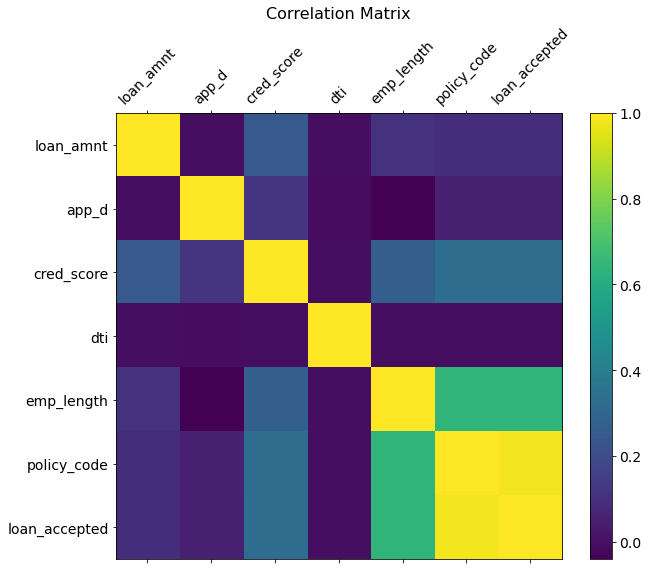

In [32]:
# plot the correlation matrix for df 
import matplotlib.pyplot as plt
f = plt.figure(figsize=(10, 8))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [33]:
# create a covariance table for df
df.cov()

,loan_amnt,app_d,cred_score,dti,emp_length,policy_code,loan_accepted
loan_amnt,1.134876e+08,-5.273271e+08,2.304096e+05,1.329690e+05,3.312091e+03,4.079149e+02,4.030657e+02
app_d,-5.273271e+08,3.982025e+15,6.424443e+08,-7.021850e+09,-7.285692e+06,1.323393e+06,1.252483e+06
cred_score,2.304096e+05,6.424443e+08,7.574868e+03,-3.946392e+03,6.718206e+01,1.143605e+01,1.125761e+01
dti,1.329690e+05,-7.021850e+09,-3.946392e+03,2.556276e+08,-1.502615e+02,-2.351561e+01,-2.326720e+01
emp_length,3.312091e+03,-7.285692e+06,6.718206e+01,-1.502615e+02,7.906193e+00,7.161963e-01,7.069633e-01
policy_code,4.079149e+02,1.323393e+06,1.143605e+01,-2.351561e+01,7.161963e-01,1.582857e-01,1.536041e-01
loan_accepted,4.030657e+02,1.252483e+06,1.125761e+01,-2.326720e+01,7.069633e-01,1.536041e-01,1.540971e-01
